Assignment 2 Machine Learning - Neural Networks

Loading the IMDB dataset

In [45]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [46]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [47]:
train_labels[0]

1

In [48]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [49]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Data Preparation

Encoding the integer sequences

In [54]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [55]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [56]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### **Model with different configures**

1. Base Model

In [139]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. Model with 1 hidden layer (model_1_HL)

In [140]:
from tensorflow import keras
from tensorflow.keras import layers

model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

3. Model with 3 hidden layers (model_3_hl)

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4. Model with fewer hidden units 32 (model_32_HU)

In [141]:
from tensorflow import keras
from tensorflow.keras import layers

model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. Model with higher hidden units 64 (model64_HU)

In [61]:
from tensorflow import keras
from tensorflow.keras import layers

model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

6. Model with mse loss function (model_mse)

In [138]:
from tensorflow import keras
from tensorflow.keras import layers

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


7. Model with tanh activation

In [63]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. Regularized Model (model_reg)

In [64]:
from tensorflow.keras import regularizers

model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

9. Model with dropout (model_drp)

In [146]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model with dropout layers
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # 50% dropout to prevent overfitting
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # Another dropout layer
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model_drp.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


Creating a validation set

In [66]:
# Create validation set (first 10,000 samples)
x_val = x_train[:10000]
y_val = y_train[:10000]

# Create training set (remaining samples after the first 10,000)
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]


### **Model Training**

1. Base Model

In [67]:
# Train the model with a validation set
Base_model = model.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for gradient updates
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.6734 - loss: 0.6234 - val_accuracy: 0.8601 - val_loss: 0.4385
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8866 - loss: 0.3797 - val_accuracy: 0.8533 - val_loss: 0.3612
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9093 - loss: 0.2793 - val_accuracy: 0.8883 - val_loss: 0.2929
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9316 - loss: 0.2150 - val_accuracy: 0.8894 - val_loss: 0.2814
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9450 - loss: 0.1751 - val_accuracy: 0.8881 - val_loss: 0.2757
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9584 - loss: 0.1430 - val_accuracy: 0.8874 - val_loss: 0.2809
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9601 - loss: 0.1309 - val_accuracy: 0.8871 - val_loss: 0.2894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9691 - loss: 0.1109 - val_accuracy: 0.8708 - v

In [147]:
# Extract the training history dictionary
Base_model_dict = Base_model.history

# Display the keys of the history dictionary
Base_model_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

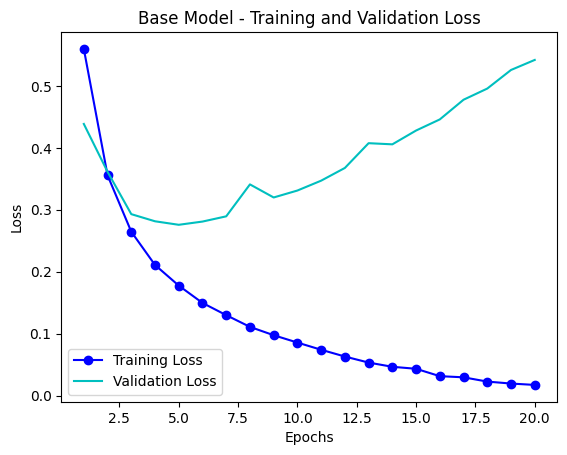

In [145]:
import matplotlib.pyplot as plt

# Extract training history
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_0, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_0, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Base Model - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

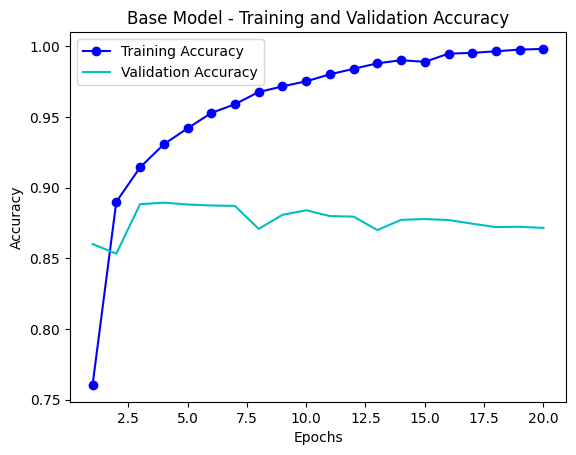

In [144]:
plt.clf()

# Extract accuracy data
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc_0, marker="o", linestyle="-", color="b", label="Training Accuracy")
plt.plot(epochs, val_acc_0, linestyle="-", color="c", label="Validation Accuracy")

# Add labels and title
plt.title("Base Model - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [143]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)

Base_model_results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7352 - loss: 0.5610
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9002 - loss: 0.2940
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9236 - loss: 0.2232
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9379 - loss: 0.1808
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8796 - loss: 0.2956


In [72]:
Base_model_results

[0.28505632281303406, 0.8856800198554993]

Predictions

In [73]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.19370301],
       [0.99919295],
       [0.81721824],
       ...,
       [0.07439565],
       [0.06991473],
       [0.5859019 ]], dtype=float32)


2. Model With 1 Hidden Layer

In [142]:
# Train model with one hidden layer and validation data
Model_1_Hidden_Layer = model_1_HL.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for optimization
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7256 - loss: 0.5569 - val_accuracy: 0.8714 - val_loss: 0.3451
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9101 - loss: 0.2767 - val_accuracy: 0.8875 - val_loss: 0.2915
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9381 - loss: 0.1978 - val_accuracy: 0.8877 - val_loss: 0.2812
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9535 - loss: 0.1583 - val_accuracy: 0.8865 - val_loss: 0.2782
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9668 - loss: 0.1279 - val_accuracy: 0.8849 - val_loss: 0.2844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9752 - loss: 0.1051 - val_accuracy: 0.8801 - val_loss: 0.2954
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9821 - loss: 0.0868 - val_accuracy: 0.8796 - val_loss: 0.3077
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9883 - loss: 0.0715 - val_accuracy: 0.8790 - 

In [75]:
# Extract the training history dictionary
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history

# Display available keys in the history dictionary
Model_1_Hidden_Layer_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

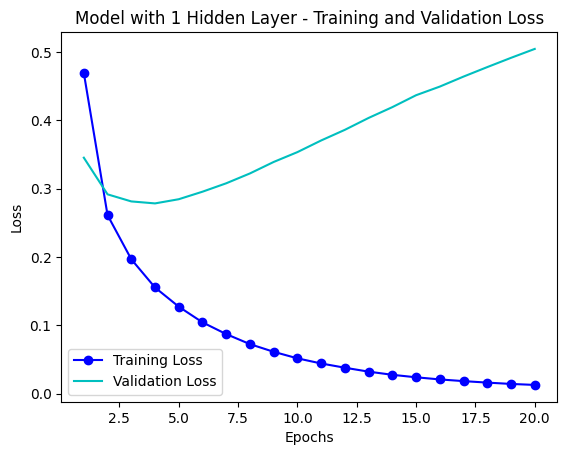

In [150]:
import matplotlib.pyplot as plt

# Extract training history
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_1, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_1, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Model with 1 Hidden Layer - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

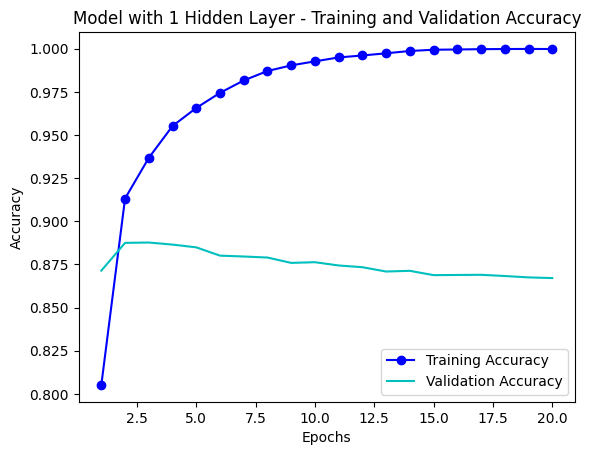

In [151]:
# Clear previous plots
plt.clf()

# Extract accuracy data
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc_1, marker="o", linestyle="-", color="b", label="Training Accuracy")
plt.plot(epochs, val_acc_1, linestyle="-", color="c", label="Validation Accuracy")

# Add labels and title
plt.title("Model with 1 Hidden Layer - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [152]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple model with 1 hidden layer
model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"),  # 1 Hidden Layer with 16 neurons
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model_1_HL.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model
model_1_HL.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model on the test set
Model_1_Hidden_Layer_Results = model_1_HL.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7584 - loss: 0.5336
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9027 - loss: 0.2975
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9210 - loss: 0.2324
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9328 - loss: 0.2013
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.2791


In [79]:
Model_1_Hidden_Layer_Results

[0.28005772829055786, 0.8880400061607361]

Predictions

In [80]:
model_1_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.31013662],
       [0.9996428 ],
       [0.91208905],
       ...,
       [0.15643534],
       [0.11917969],
       [0.59078014]], dtype=float32)

2. Model With 3 Hidden Layer

In [153]:
# Train the model with 3 hidden layers using a validation set
Model_3_Hidden_Layer = model_3_HL.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for optimization
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9636 - loss: 0.1061 - val_accuracy: 0.9542 - val_loss: 0.1265
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9744 - loss: 0.0841 - val_accuracy: 0.9566 - val_loss: 0.1240
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9820 - loss: 0.0651 - val_accuracy: 0.9494 - val_loss: 0.1366
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9861 - loss: 0.0548 - val_accuracy: 0.9447 - val_loss: 0.1509
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9910 - loss: 0.0412 - val_accuracy: 0.9384 - val_loss: 0.1710
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9933 - loss: 0.0332 - val_accuracy: 0.9271 - val_loss: 0.2187
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9946 - loss: 0.0281 - val_accuracy: 0.9220 - val_loss: 0.2398
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9956 - loss: 0.0223 - val_accuracy: 0.9258 - v

In [82]:
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

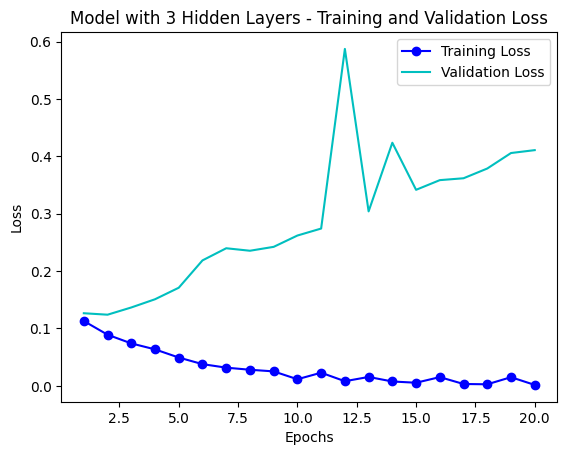

In [156]:
import matplotlib.pyplot as plt

# Extract training history
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_3, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_3, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Model with 3 Hidden Layers - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

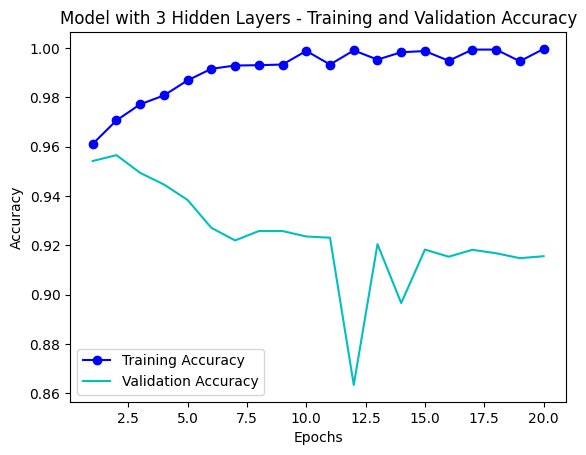

In [157]:
# Clear previous plots
plt.clf()

# Extract accuracy data
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc_3, marker="o", linestyle="-", color="b", label="Training Accuracy")
plt.plot(epochs, val_acc_3, linestyle="-", color="c", label="Validation Accuracy")

# Add labels and title
plt.title("Model with 3 Hidden Layers - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [158]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a model with 3 hidden layers
model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"),  # 1st Hidden Layer
    layers.Dense(16, activation="relu"),  # 2nd Hidden Layer
    layers.Dense(16, activation="relu"),  # 3rd Hidden Layer
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model_3_HL.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model (using 6 epochs since performance dips after 7)
model_3_HL.fit(x_train, y_train, epochs=6, batch_size=512)

# Evaluate the model on the test set
Model_3_Hidden_Layer_Results = model_3_HL.evaluate(x_test, y_test)

# Print evaluation results
print(f"Test Loss: {Model_3_Hidden_Layer_Results[0]:.4f}")
print(f"Test Accuracy: {Model_3_Hidden_Layer_Results[1]:.4f}")


Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6815 - loss: 0.6034
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8955 - loss: 0.3091
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9228 - loss: 0.2203
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9359 - loss: 0.1822
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9462 - loss: 0.1578
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9532 - loss: 0.1355
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8739 - loss: 0.3339
Test Loss: 0.3327
Test Accuracy: 0.8762


In [160]:
Model_3_Hidden_Layer_Results

[0.3327001929283142, 0.8762400150299072]

Predictions

In [161]:
model_3_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.08917762],
       [0.9992138 ],
       [0.25852048],
       ...,
       [0.08143191],
       [0.03606384],
       [0.6905936 ]], dtype=float32)

4. Model With 32 Hidden Units

In [162]:
# Train the model with 32 hidden units using a validation set
Model_32_Hidden_Units = model_32_HU.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for optimization
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.7295 - loss: 0.1801 - val_accuracy: 0.8816 - val_loss: 0.0873
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9340 - loss: 0.0524 - val_accuracy: 0.8881 - val_loss: 0.0837
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9673 - loss: 0.0312 - val_accuracy: 0.8783 - val_loss: 0.0908
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9801 - loss: 0.0212 - val_accuracy: 0.8736 - val_loss: 0.0972
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9873 - loss: 0.0142 - val_accuracy: 0.8752 - val_loss: 0.1014
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9901 - loss: 0.0109 - val_accuracy: 0.8685 - val_loss: 0.1072
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9896 - loss: 0.0114 - val_accuracy: 0.8671 - val_loss: 0.1118
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9924 - loss: 0.0086 - val_accuracy: 0.8691 - 

In [163]:
# Extract the training history dictionary
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history

# Display available keys in the history dictionary
Model_32_Hidden_Units_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

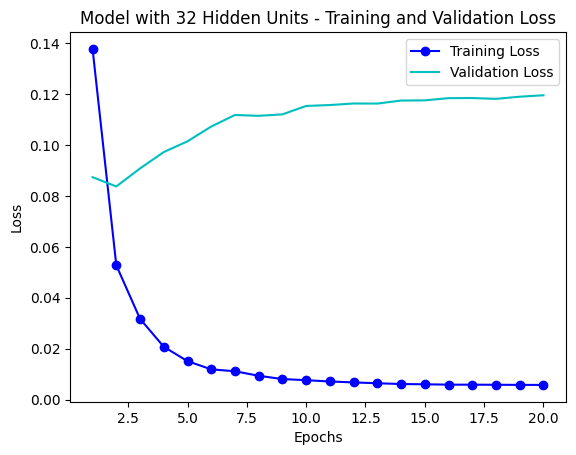

In [164]:
import matplotlib.pyplot as plt

# Extract training history
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_32, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_32, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Model with 32 Hidden Units - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

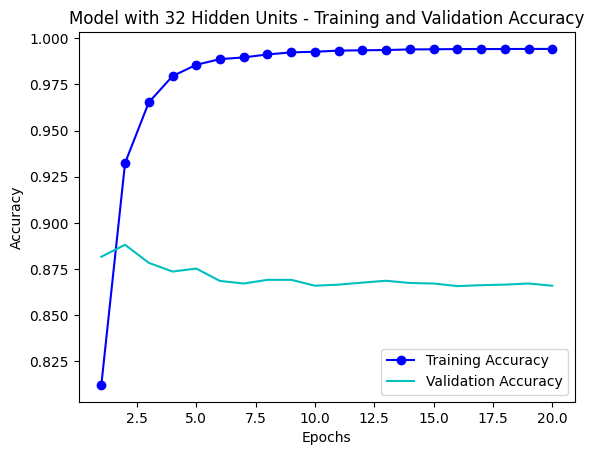

In [165]:
# Clear previous plots
plt.clf()

# Extract accuracy data
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]

# Plot training and validation accuracy
plt.plot(epochs, acc_32, marker="o", linestyle="-", color="b", label="Training Accuracy")
plt.plot(epochs, val_acc_32, linestyle="-", color="c", label="Validation Accuracy")

# Add labels and title
plt.title("Model with 32 Hidden Units - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [166]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a model with 32 hidden units in each layer
model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"),  # 1st Hidden Layer with 32 units
    layers.Dense(32, activation="relu"),  # 2nd Hidden Layer with 32 units
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model_32_HU.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model (using 3 epochs since performance dips after that)
model_32_HU.fit(x_train, y_train, epochs=3, batch_size=512)

# Evaluate the model on the test set
Model_32_Hidden_Units_Results = model_32_HU.evaluate(x_test, y_test)

# Print evaluation results
print(f"Test Loss: {Model_32_Hidden_Units_Results[0]:.4f}")
print(f"Test Accuracy: {Model_32_Hidden_Units_Results[1]:.4f}")


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7343 - loss: 0.5576
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8955 - loss: 0.2826
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9254 - loss: 0.2105
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8862 - loss: 0.2783
Test Loss: 0.2775
Test Accuracy: 0.8870


In [93]:
Model_32_Hidden_Units_Results

[0.3276422917842865, 0.8669599890708923]

Prediction

In [94]:
model_32_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.14980674],
       [0.999504  ],
       [0.329789  ],
       ...,
       [0.06701789],
       [0.04503978],
       [0.25728568]], dtype=float32)

5. Model With 64 Hidden Units

In [167]:
# Train the model with 64 hidden units using a validation set
Model_64_Hidden_Units = model_64_HU.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for optimization
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9238 - loss: 0.2005 - val_accuracy: 0.9312 - val_loss: 0.1879
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9391 - loss: 0.1675 - val_accuracy: 0.8821 - val_loss: 0.2839
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9450 - loss: 0.1461 - val_accuracy: 0.9155 - val_loss: 0.2224
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9668 - loss: 0.1049 - val_accuracy: 0.9096 - val_loss: 0.2408
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9712 - loss: 0.0898 - val_accuracy: 0.8999 - val_loss: 0.2721
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9810 - loss: 0.0706 - val_accuracy: 0.8962 - val_loss: 0.2963
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9849 - loss: 0.0562 - val_accuracy: 0.9040 - val_loss: 0.2829
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9904 - loss: 0.0390 - val_accuracy: 0.9019 - 

In [96]:
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

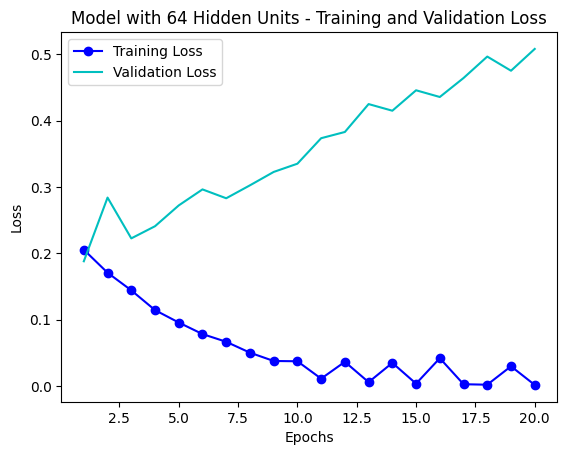

In [169]:
import matplotlib.pyplot as plt

# Extract training history
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_64, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_64, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Model with 64 Hidden Units - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

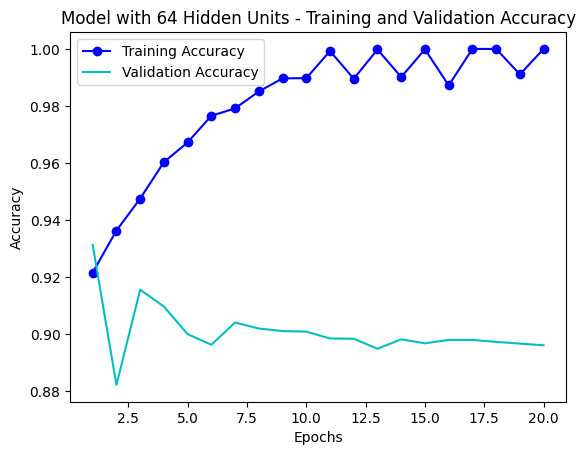

In [170]:
import matplotlib.pyplot as plt

# Clear previous plots
plt.clf()

# Extract accuracy data
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
epochs = range(1, len(acc_64) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc_64, marker="o", linestyle="-", color="b", label="Training Accuracy")
plt.plot(epochs, val_acc_64, linestyle="-", color="c", label="Validation Accuracy")

# Add labels and title
plt.title("Model with 64 Hidden Units - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [171]:
from tensorflow import keras
from tensorflow.keras import layers

# Define a model with 64 hidden units in each layer
model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"),  # 1st Hidden Layer with 64 units
    layers.Dense(64, activation="relu"),  # 2nd Hidden Layer with 64 units
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model_64_HU.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train the model (using 2 epochs since performance dips after that)
model_64_HU.fit(x_train, y_train, epochs=2, batch_size=512)

# Evaluate the model on the test set
Model_64_Hidden_Units_Results = model_64_HU.evaluate(x_test, y_test)

# Print evaluation results
print(f"Test Loss: {Model_64_Hidden_Units_Results[0]:.4f}")
print(f"Test Accuracy: {Model_64_Hidden_Units_Results[1]:.4f}")


Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7013 - loss: 0.5535
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9022 - loss: 0.2637
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8834 - loss: 0.2866
Test Loss: 0.2871
Test Accuracy: 0.8842


In [100]:
Model_64_Hidden_Units_Results

[0.27650773525238037, 0.8893200159072876]

Prediction

In [101]:
model_64_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.25629324],
       [0.9961728 ],
       [0.87212306],
       ...,
       [0.12682062],
       [0.08795777],
       [0.5056658 ]], dtype=float32)

5. Model With MSE Loss

In [172]:
# Train the model using Mean Squared Error (MSE) loss with validation data
Model_MSE_LOSS = model_mse.fit(
    partial_x_train,  # Training data
    partial_y_train,  # Training labels
    epochs=20,        # Number of training epochs
    batch_size=512,   # Batch size for optimization
    validation_data=(x_val, y_val)  # Validation data
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6942 - loss: 0.2094 - val_accuracy: 0.8622 - val_loss: 0.1280
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8896 - loss: 0.1085 - val_accuracy: 0.8787 - val_loss: 0.1014
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9135 - loss: 0.0798 - val_accuracy: 0.8854 - val_loss: 0.0895
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9289 - loss: 0.0661 - val_accuracy: 0.8564 - val_loss: 0.1051
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9334 - loss: 0.0582 - val_accuracy: 0.8764 - val_loss: 0.0917
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9458 - loss: 0.0498 - val_accuracy: 0.8846 - val_loss: 0.0855
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9582 - loss: 0.0405 - val_accuracy: 0.8857 - val_loss: 0.0840
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9610 - loss: 0.0390 - val_accuracy: 0.8816 - v

In [103]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

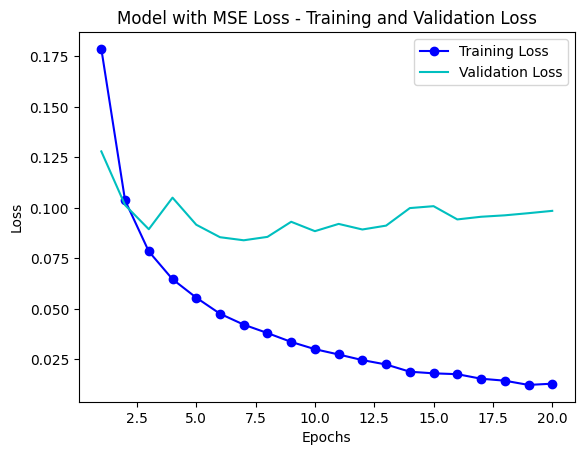

In [173]:
import matplotlib.pyplot as plt

# Extract training history
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values_MSE, marker="o", linestyle="-", color="b", label="Training Loss")
plt.plot(epochs, val_loss_values_MSE, linestyle="-", color="c", label="Validation Loss")

# Add labels and title
plt.title("Model with MSE Loss - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

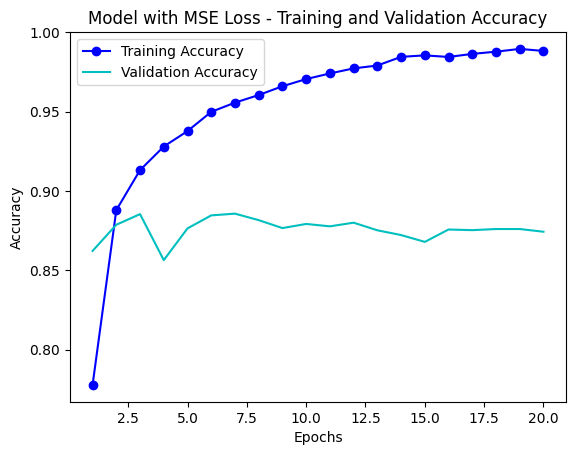

In [174]:
import matplotlib.pyplot as plt

# Clear previous plots
plt.clf()

# Check if accuracy exists in history
if "accuracy" in Model_MSE_LOSS_dict and "val_accuracy" in Model_MSE_LOSS_dict:
    acc_MSE = Model_MSE_LOSS_dict["accuracy"]
    val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
    epochs = range(1, len(acc_MSE) + 1)

    # Plot training and validation accuracy
    plt.plot(epochs, acc_MSE, marker="o", linestyle="-", color="b", label="Training Accuracy")
    plt.plot(epochs, val_acc_MSE, linestyle="-", color="c", label="Validation Accuracy")

    # Add labels and title
    plt.title("Model with MSE Loss - Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Display the plot
    plt.show()
else:
    print("Accuracy metrics not found. Did you include 'accuracy' in model.compile()?")


Retraining

In [177]:
import keras
from keras import layers

# Define the model architecture
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),  # Hidden Layer 1
    layers.Dense(16, activation="relu"),  # Hidden Layer 2
    layers.Dense(1, activation="sigmoid") # Output Layer
])

# Compile the model with MSE loss and accuracy metric
model_mse.compile(optimizer="rmsprop",
                  loss="mse",  # Mean Squared Error as loss function
                  metrics=["accuracy"])

# Train the model
model_mse.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate on test data
Model_MSE_LOSS_Results = model_mse.evaluate(x_test, y_test)

# Print results
print("Test Loss & Accuracy:", Model_MSE_LOSS_Results)



Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7126 - loss: 0.1980
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8968 - loss: 0.0920
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9163 - loss: 0.0700
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9343 - loss: 0.0570
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8738 - loss: 0.0924
Test Loss & Accuracy: [0.09231123328208923, 0.874239981174469]


In [107]:
Model_MSE_LOSS_Results

[0.08326872438192368, 0.8886399865150452]

Prediction

In [108]:
model_mse.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.20180672],
       [0.99896395],
       [0.8078605 ],
       ...,
       [0.14412981],
       [0.10209353],
       [0.4804851 ]], dtype=float32)

6. Model With tanh activation

In [178]:
# Train the model using the tanh activation function
Model_TANH_ACT = model_tanh.fit(
    partial_x_train,   # Training data (features)
    partial_y_train,   # Training data (labels)
    epochs=20,         # Number of training epochs
    batch_size=512,    # Batch size for gradient updates
    validation_data=(x_val, y_val)  # Validation data for performance monitoring
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9493 - loss: 0.1492 - val_accuracy: 0.9403 - val_loss: 0.1677
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9554 - loss: 0.1323 - val_accuracy: 0.9259 - val_loss: 0.1939
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9675 - loss: 0.1004 - val_accuracy: 0.9275 - val_loss: 0.2007
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9781 - loss: 0.0778 - val_accuracy: 0.9101 - val_loss: 0.2563
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9808 - loss: 0.0688 - val_accuracy: 0.8999 - val_loss: 0.3053
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9857 - loss: 0.0532 - val_accuracy: 0.9113 - val_loss: 0.2825
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9895 - loss: 0.0397 - val_accuracy: 0.9077 - val_loss: 0.3131
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9864 - loss: 0.0460 - val_accuracy: 0.9057 - v

In [111]:
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

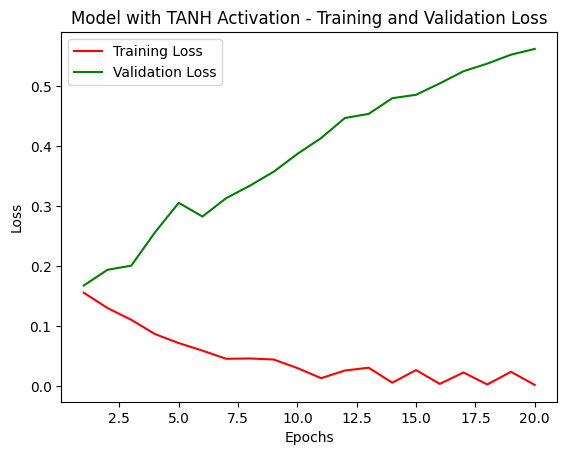

In [181]:
import matplotlib.pyplot as plt

# Extract training history from the trained model
Model_TANH_ACT_dict = Model_TANH_ACT.history

# Retrieve training and validation loss values
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]

# Create an epoch range for plotting
epochs = range(1, len(loss_values_TANH) + 1)

# Plot training and validation loss with different colors
plt.plot(epochs, loss_values_TANH, "r", label="Training Loss")  # Red for training loss
plt.plot(epochs, val_loss_values_TANH, "g", label="Validation Loss")  # Green for validation loss

# Add plot title and labels
plt.title("Model with TANH Activation - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plot
plt.show()


Plotting Accuracy

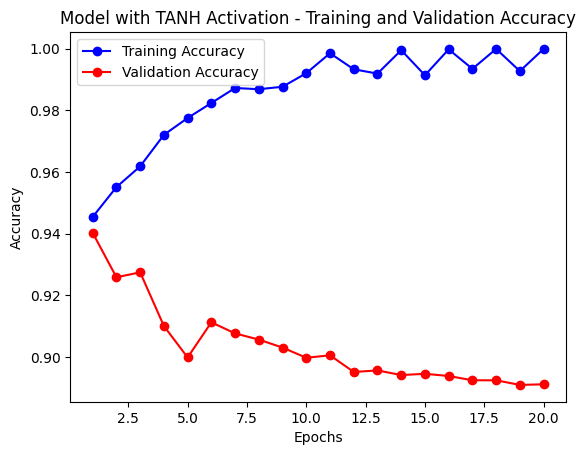

In [183]:
import matplotlib.pyplot as plt

# Clear the previous figure
plt.clf()

# Extract accuracy values from training history
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]

# Plot training and validation accuracy with blue and red dots
plt.plot(epochs, acc_TANH, "bo-", label="Training Accuracy")  # Blue dots with a solid line
plt.plot(epochs, val_acc_TANH, "ro-", label="Validation Accuracy")  # Red dots with a solid line

# Add plot title and labels
plt.title("Model with TANH Activation - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Display the plot
plt.show()


Retraining

In [185]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a Sequential model with TANH activation
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),  # First hidden layer with Tanh activation
    layers.Dense(16, activation="tanh"),  # Second hidden layer with Tanh activation
    layers.Dense(1, activation="sigmoid")  # Output layer with Sigmoid activation
])

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model_tanh.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Train the model using training data
# Selected 3 epochs as accuracy starts to dip after 3 epochs
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512)

# Evaluate the trained model on test data
Model_TANH_ACT_Results = model_tanh.evaluate(x_test, y_test)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7424 - loss: 0.5294
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9062 - loss: 0.2591
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9312 - loss: 0.1901
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8760 - loss: 0.3052


In [115]:
Model_TANH_ACT_Results

[0.28518301248550415, 0.8850399851799011]

Prediction

In [116]:
model_tanh.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.11988028],
       [0.99729896],
       [0.7999826 ],
       ...,
       [0.08692544],
       [0.05220948],
       [0.5286925 ]], dtype=float32)

7. Model With L2 Regularization

In [186]:
# Train the model with regularization techniques
Model_Reg_Tech = model_reg.fit(
    partial_x_train,  # Training data (features)
    partial_y_train,  # Training data (labels)
    epochs=20,  # Number of training epochs
    batch_size=512,  # Batch size for training
    validation_data=(x_val, y_val)  # Validation data (features & labels)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9208 - loss: 0.2761 - val_accuracy: 0.9221 - val_loss: 0.2657
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9316 - loss: 0.2434 - val_accuracy: 0.9114 - val_loss: 0.2801
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9462 - loss: 0.2139 - val_accuracy: 0.8961 - val_loss: 0.3080
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9562 - loss: 0.1970 - val_accuracy: 0.9032 - val_loss: 0.2947
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9613 - loss: 0.1828 - val_accuracy: 0.8984 - val_loss: 0.3057
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9668 - loss: 0.1722 - val_accuracy: 0.8917 - val_loss: 0.3281
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9735 - loss: 0.1616 - val_accuracy: 0.8926 - val_loss: 0.3294
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9705 - loss: 0.1603 - val_accuracy: 0.8893 - v

In [118]:
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

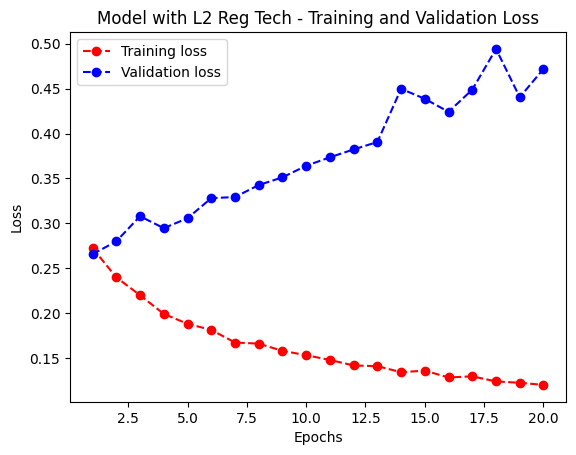

In [187]:
import matplotlib.pyplot as plt

# Extract loss history from the trained model with regularization techniques
Model_Reg_Tech_dict = Model_Reg_Tech.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]  # Training loss values
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]  # Validation loss values

# Define the range of epochs
epochs = range(1, len(loss_values_Reg) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss_values_Reg, "ro--", label="Training loss")  # Red dashed line with dots
plt.plot(epochs, val_loss_values_Reg, "bo--", label="Validation loss")  # Blue dashed line with dots

# Add title and labels
plt.title("Model with L2 Reg Tech - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Show the plot
plt.show()


Plotting Accuracy

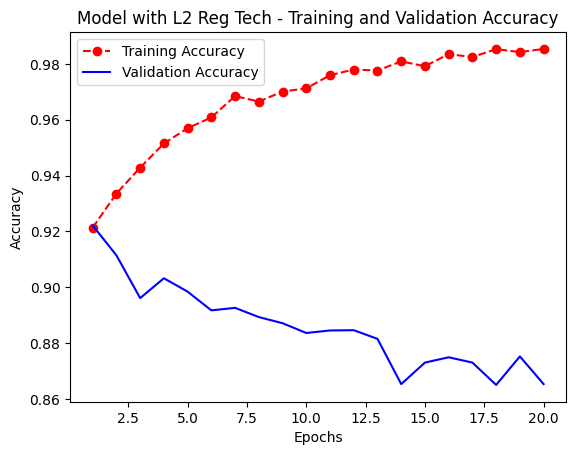

In [188]:
import matplotlib.pyplot as plt

# Clear the previous figure
plt.clf()

# Extract accuracy history from the trained model with regularization techniques
acc_Reg = Model_Reg_Tech_dict["accuracy"]  # Training accuracy values
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]  # Validation accuracy values

# Define the range of epochs
epochs = range(1, len(acc_Reg) + 1)

# Plot training accuracy with dots
plt.plot(epochs, acc_Reg, "ro--", label="Training Accuracy")  # Red dashed line with dots

# Plot validation accuracy with a solid blue line
plt.plot(epochs, val_acc_Reg, "b", label="Validation Accuracy")  # Plain blue line

# Add title and labels
plt.title("Model with L2 Reg Tech - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Show the plot
plt.show()


Retraining

In [189]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Define a Sequential model with L2 regularization
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization (λ=0.001)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization (λ=0.001)
    layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation for binary classification
])

# Compile the model with binary cross-entropy loss and RMSprop optimizer
model_reg.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

# Train the model for 2 epochs with batch size 512
# Epochs limited to 2 as performance starts dipping after 3 epochs
model_reg.fit(x_train, y_train, epochs=2, batch_size=512)

# Evaluate the model performance on the test dataset
Model_Reg_Tech_Results = model_reg.evaluate(x_test, y_test)


Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7333 - loss: 0.6169
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9001 - loss: 0.3522
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8779 - loss: 0.3556


In [122]:
Model_Reg_Tech_Results

[0.3358316719532013, 0.8867999911308289]

Using Trained data to predict

In [123]:
model_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.35722595],
       [0.9968445 ],
       [0.8978305 ],
       ...,
       [0.19161034],
       [0.21153678],
       [0.5420196 ]], dtype=float32)

9. Model With Dropout Technique

In [190]:
# Train the dropout-regularized model
Model_Drp_Tech = model_drp.fit(
    partial_x_train,    # Training data (excluding validation set)
    partial_y_train,    # Corresponding labels for training data
    epochs=20,          # Train for 20 epochs
    batch_size=512,     # Use a batch size of 512
    validation_data=(x_val, y_val)  # Validation set for monitoring performance
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5847 - loss: 0.6586 - val_accuracy: 0.8284 - val_loss: 0.5068
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7608 - loss: 0.5131 - val_accuracy: 0.8705 - val_loss: 0.3763
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8155 - loss: 0.4299 - val_accuracy: 0.8777 - val_loss: 0.3332
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8565 - loss: 0.3635 - val_accuracy: 0.8876 - val_loss: 0.2908
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8843 - loss: 0.3149 - val_accuracy: 0.8882 - val_loss: 0.2813
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9047 - loss: 0.2785 - val_accuracy: 0.8865 - val_loss: 0.2762
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9216 - loss: 0.2391 - val_accuracy: 0.8882 - val_loss: 0.2738
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9311 - loss: 0.2170 - val_accuracy: 0.8833 - v

In [125]:
Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

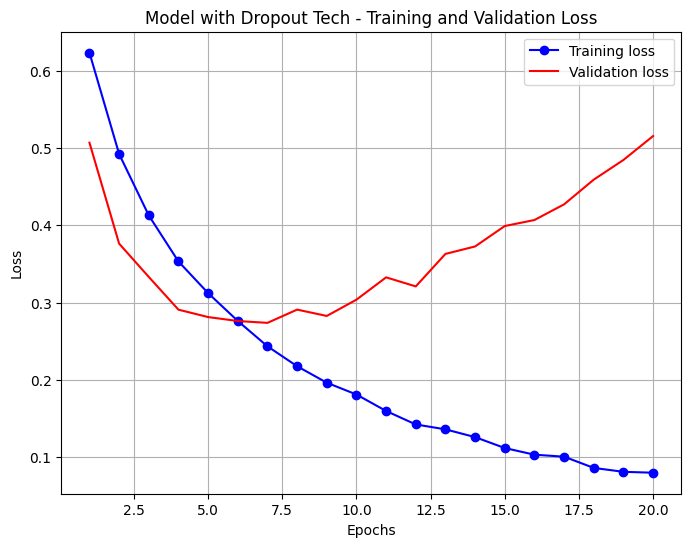

In [191]:
import matplotlib.pyplot as plt

# Extract training history
Model_Drp_Tech_dict = Model_Drp_Tech.history

# Get loss values for training and validation
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]

# Define epochs range
epochs = range(1, len(loss_values_Drp) + 1)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values_Drp, "bo-", label="Training loss")  # 'bo-' for blue dots with line
plt.plot(epochs, val_loss_values_Drp, "r-", label="Validation loss")  # 'r-' for red solid line
plt.title("Model with Dropout Tech - Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()


Plotting Accuracy

<Figure size 640x480 with 0 Axes>

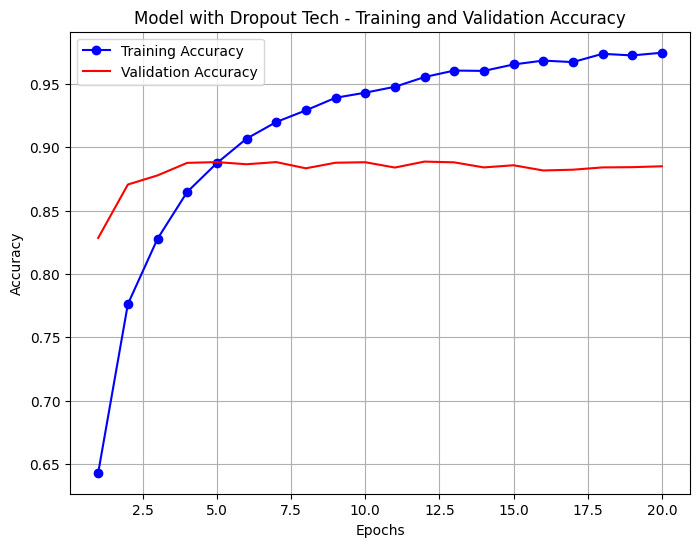

In [192]:
import matplotlib.pyplot as plt

# Clear previous figure
plt.clf()

# Extract accuracy values for training and validation
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]

# Define epochs range
epochs = range(1, len(acc_Drp) + 1)

# Plot accuracy values
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc_Drp, "bo-", label="Training Accuracy")  # 'bo-' for blue dots with line
plt.plot(epochs, val_acc_Drp, "r-", label="Validation Accuracy")  # 'r-' for red solid line

# Set title and labels
plt.title("Model with Dropout Tech - Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)  # Enable grid for better readability
plt.show()


Retraining

In [193]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model with Dropout technique
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),  # First hidden layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(16, activation="relu"),  # Second hidden layer with ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(1, activation="sigmoid")  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_drp.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

# Train the model on the dataset
model_drp.fit(x_train, y_train, epochs=9, batch_size=512)  # 9 epochs as stabilization occurs from 9

# Evaluate the model on the test dataset
Model_Drp_Tech_Results = model_drp.evaluate(x_test, y_test)


Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6177 - loss: 0.6439
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7980 - loss: 0.4785
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8510 - loss: 0.3881
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8781 - loss: 0.3327
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9028 - loss: 0.2839
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9145 - loss: 0.2528
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9259 - loss: 0.2270
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9335 - loss: 0.2052
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9383 - loss: 0.1860
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8833 - loss: 0.3247


In [129]:
Model_Drp_Tech_Results

[0.3250279128551483, 0.8853999972343445]

Prediction

In [130]:
model_drp.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.10196865],
       [1.        ],
       [0.99861175],
       ...,
       [0.0966865 ],
       [0.05728926],
       [0.53172886]], dtype=float32)

**Comparison of the Models**



Fetching the training history for all models

In [194]:
# Extract history dictionaries for each trained model
Base_model_dict = Base_model.history
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Drp_Tech_dict = Model_Drp_Tech.history

# Print the keys available in each history dictionary
print("Base Model:", Base_model_dict.keys())
print("1 Hidden Layer Model:", Model_1_Hidden_Layer_dict.keys())
print("3 Hidden Layers Model:", Model_3_Hidden_Layer_dict.keys())
print("32 Hidden Units Model:", Model_32_Hidden_Units_dict.keys())
print("64 Hidden Units Model:", Model_64_Hidden_Units_dict.keys())
print("MSE Loss Model:", Model_MSE_LOSS_dict.keys())
print("Tanh Activation Model:", Model_TANH_ACT_dict.keys())
print("L2 Regularization Model:", Model_Reg_Tech_dict.keys())
print("Dropout Technique Model:", Model_Drp_Tech_dict.keys())


Base Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
1 Hidden Layer Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
3 Hidden Layers Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
32 Hidden Units Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
64 Hidden Units Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
MSE Loss Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Tanh Activation Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
L2 Regularization Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Dropout Technique Model: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Question 1 - Comparing Hidden layers with Base Model


Base Model history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
1 Hidden Layer history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
3 Hidden Layers history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


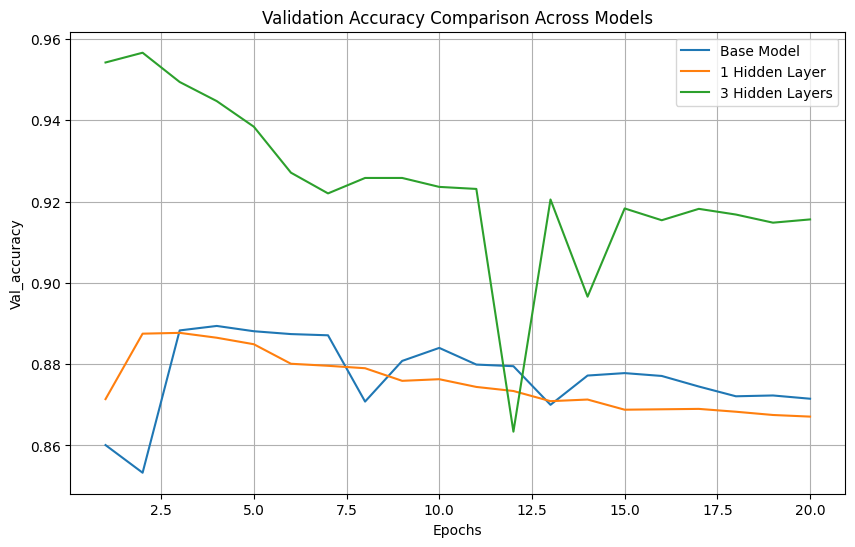

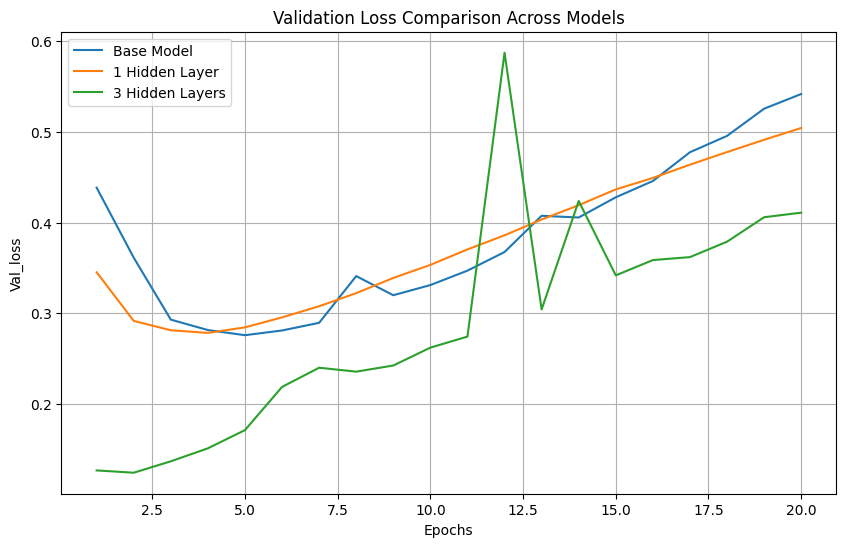

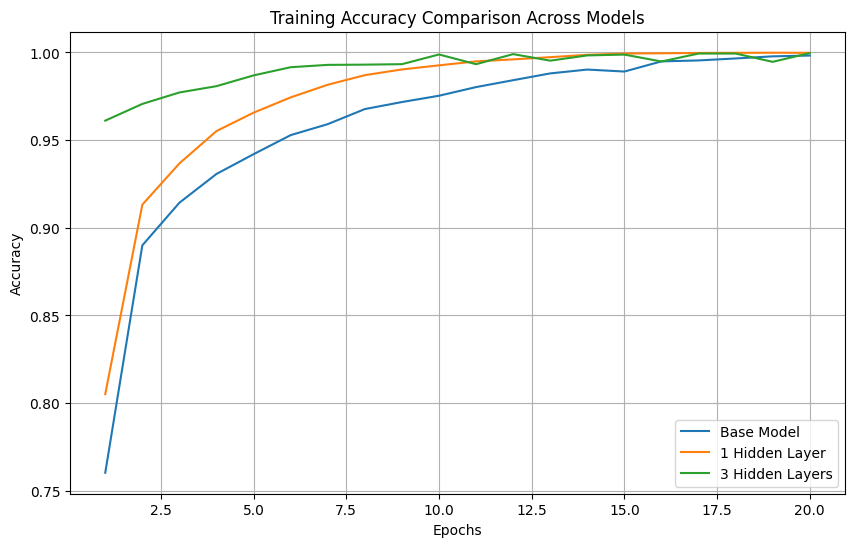

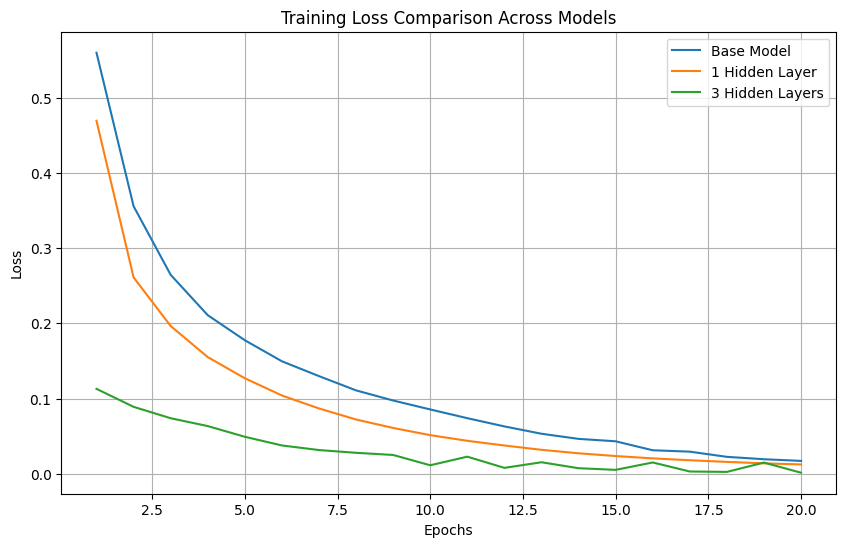

In [195]:
import matplotlib.pyplot as plt

# Dictionary of models and their training histories
model_histories = {
    "Base Model": Base_model,
    "1 Hidden Layer": Model_1_Hidden_Layer,
    "3 Hidden Layers": Model_3_Hidden_Layer,
}

# Display available keys in each model's history
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {list(history_dict.keys())}")  # Convert to list for better readability

# Function to plot training and validation metrics across models
def plot_metrics(metric, title):
    """Plots the specified metric for all models"""
    plt.figure(figsize=(10, 6))  # Set figure size
    for model_name, model in model_histories.items():
        metric_values = model.history.get(metric, [])  # Use .get() to prevent errors if key is missing
        if metric_values:  # Check if metric exists
            plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name}")

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(loc="best")  # Automatically position the legend
    plt.grid(True)  # Add grid for better readability
    plt.show()

# Plot accuracy and loss comparisons
plot_metrics('val_accuracy', 'Validation Accuracy Comparison Across Models')
plot_metrics('val_loss', 'Validation Loss Comparison Across Models')
plot_metrics('accuracy', 'Training Accuracy Comparison Across Models')
plot_metrics('loss', 'Training Loss Comparison Across Models')


Question 2 - Comparing Base model with Hidden Units value of 16, 32 and 64

Base Model history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
32 Hidden Units history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
64 Hidden Units history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


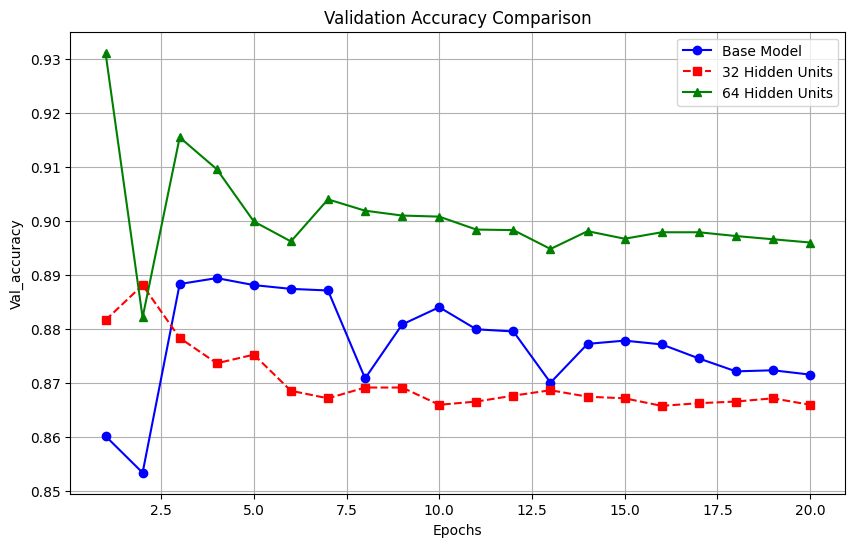

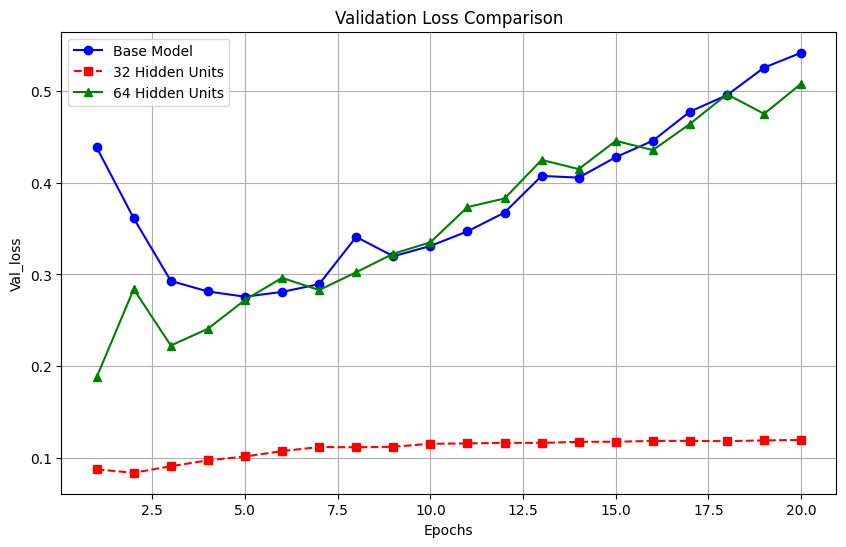

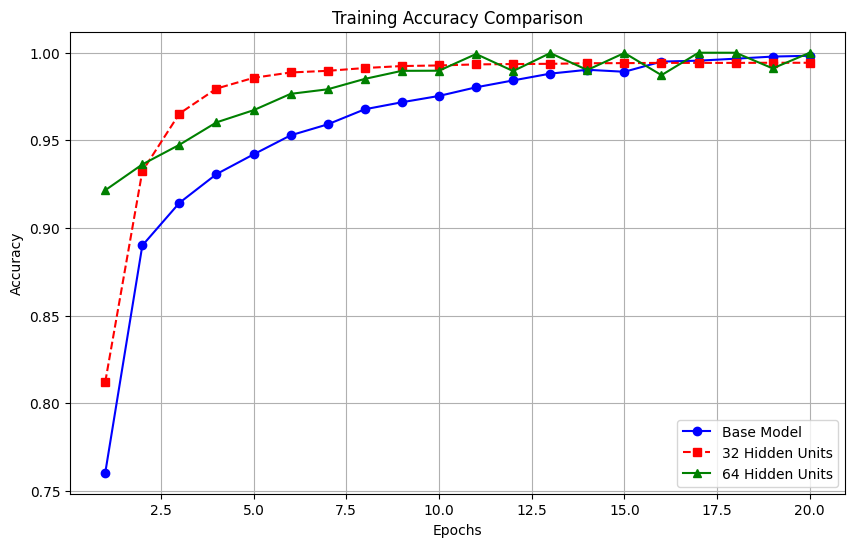

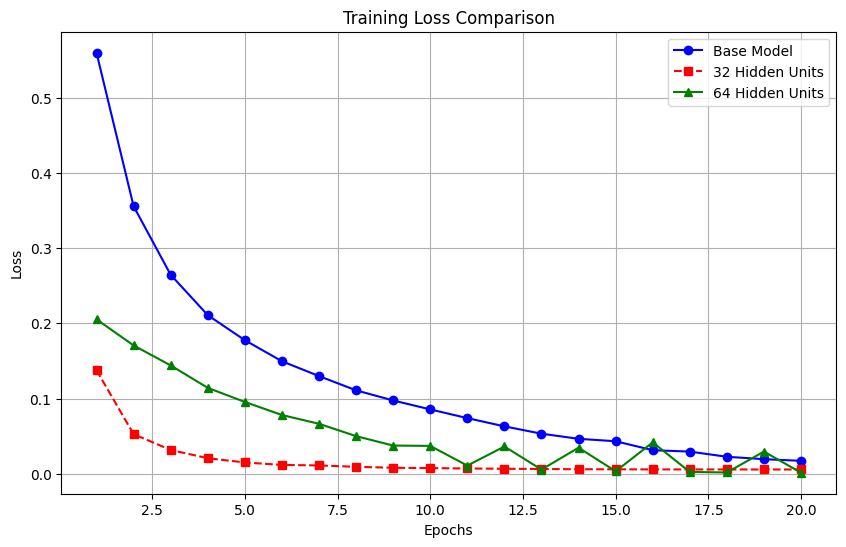

In [196]:
import matplotlib.pyplot as plt

# Dictionary of models and their training histories
model_histories = {
    "Base Model": Base_model,
    "32 Hidden Units": Model_32_Hidden_Units,
    "64 Hidden Units": Model_64_Hidden_Units,
}

# Display available keys in each model's history
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {list(history_dict.keys())}")  # Convert to list for better readability

# Define different line styles and colors for better visualization
line_styles = ['b-o', 'r--s', 'g-^']  # Blue circles, Red dashed squares, Green triangles

# Function to plot training and validation metrics across models
def plot_metrics(metric, title):
    """Plots the specified metric for all models"""
    plt.figure(figsize=(10, 6))  # Set figure size

    for (model_name, model), style in zip(model_histories.items(), line_styles):
        metric_values = model.history.get(metric, [])  # Use .get() to prevent errors if key is missing
        if metric_values:  # Check if metric exists
            plt.plot(range(1, len(metric_values) + 1), metric_values, style, label=f"{model_name}")

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(loc="best")  # Automatically position the legend
    plt.grid(True)  # Add grid for better readability
    plt.show()

# Plot accuracy and loss comparisons
plot_metrics('val_accuracy', 'Validation Accuracy Comparison')
plot_metrics('val_loss', 'Validation Loss Comparison')
plot_metrics('accuracy', 'Training Accuracy Comparison')
plot_metrics('loss', 'Training Loss Comparison')


Question 3 - MSE loss function

Base Model history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']
MSE Loss Model history keys: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


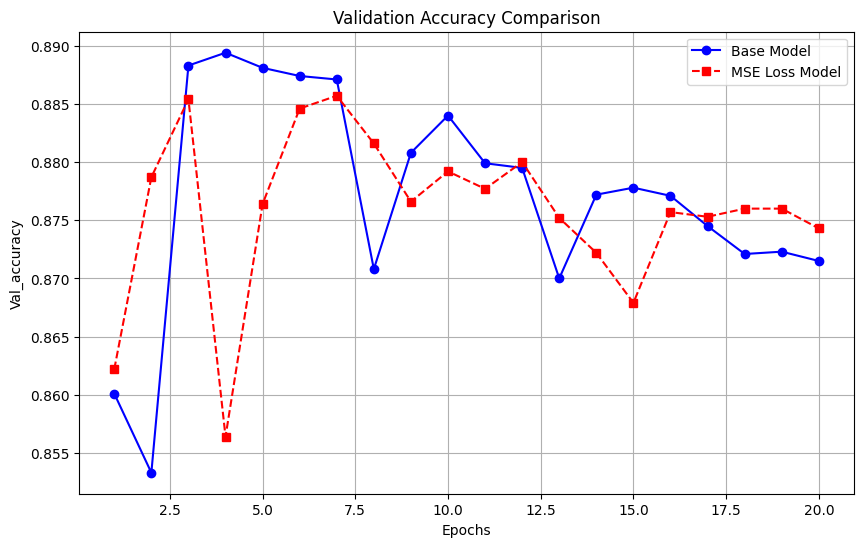

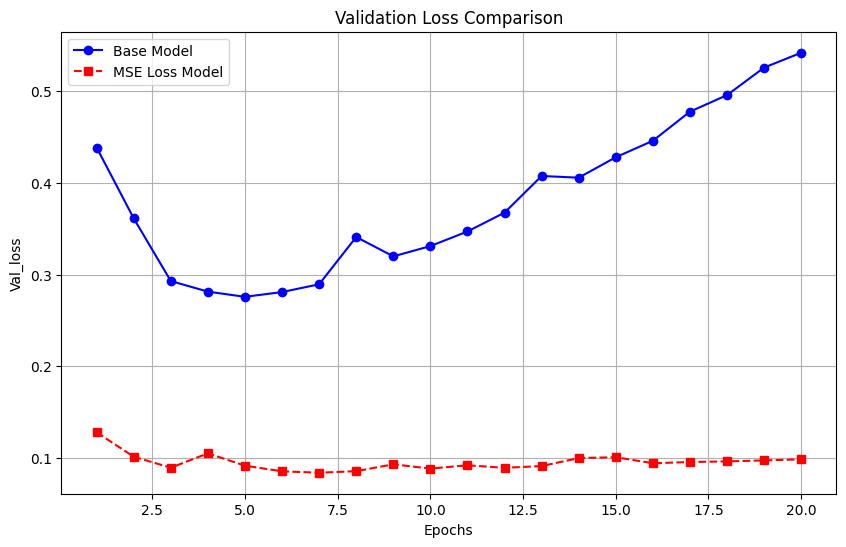

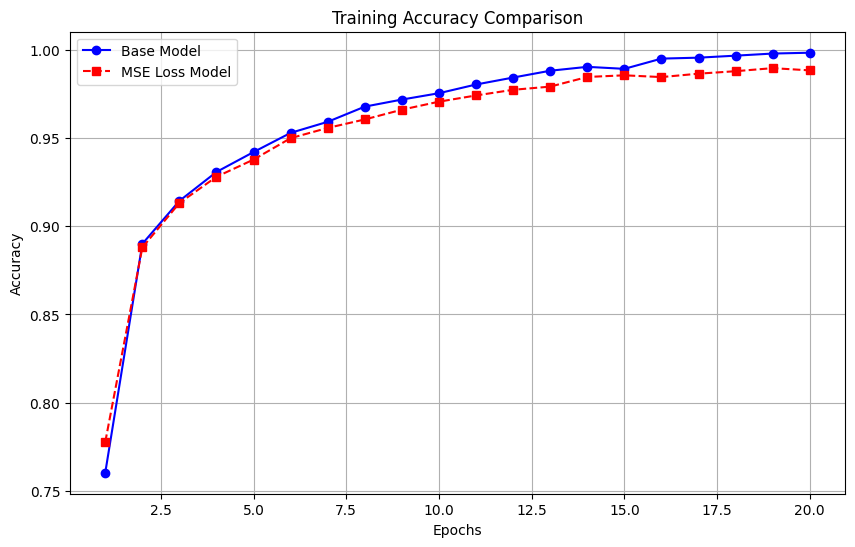

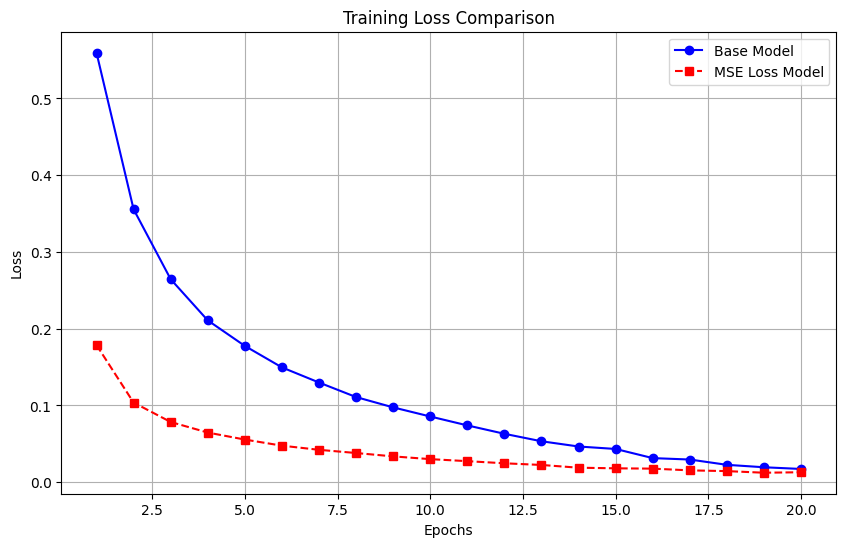

In [197]:
import matplotlib.pyplot as plt

# Dictionary of models and their training histories
model_histories = {
    "Base Model": Base_model,
    "MSE Loss Model": Model_MSE_LOSS,
}

# Display available keys in each model's history
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {list(history_dict.keys())}")  # Convert to list for better readability

# Define different line styles and colors for better visualization
line_styles = ['b-o', 'r--s']  # Blue circles, Red dashed squares

# Function to plot training and validation metrics across models
def plot_metrics(metric, title):
    """Plots the specified metric for all models"""
    plt.figure(figsize=(10, 6))  # Set figure size

    for (model_name, model), style in zip(model_histories.items(), line_styles):
        metric_values = model.history.get(metric, [])  # Use .get() to prevent errors if key is missing
        if metric_values:  # Check if metric exists
            plt.plot(range(1, len(metric_values) + 1), metric_values, style, label=f"{model_name}")

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(loc="best")  # Automatically position the legend
    plt.grid(True)  # Add grid for better readability
    plt.show()

# Plot accuracy and loss comparisons
plot_metrics('val_accuracy', 'Validation Accuracy Comparison')
plot_metrics('val_loss', 'Validation Loss Comparison')
plot_metrics('accuracy', 'Training Accuracy Comparison')
plot_metrics('loss', 'Training Loss Comparison')


Question 4 - Comparing Tanh activation with base model which has relu activation function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


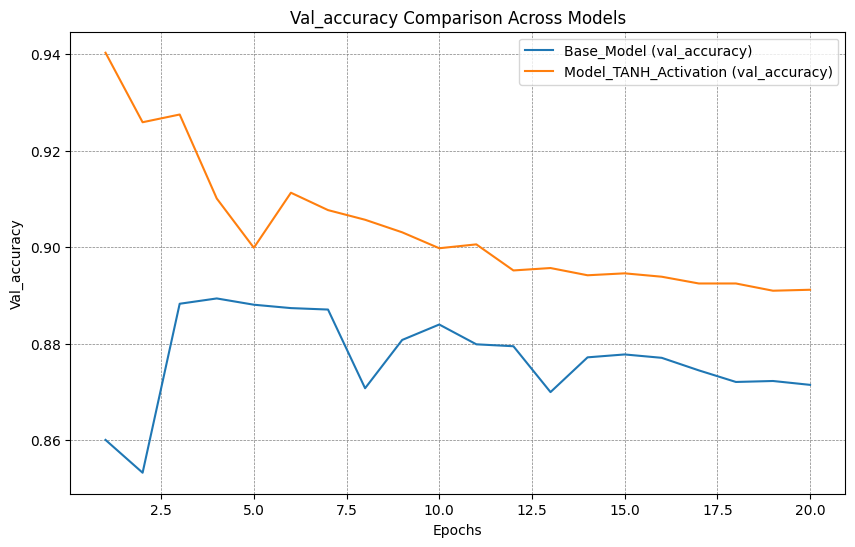

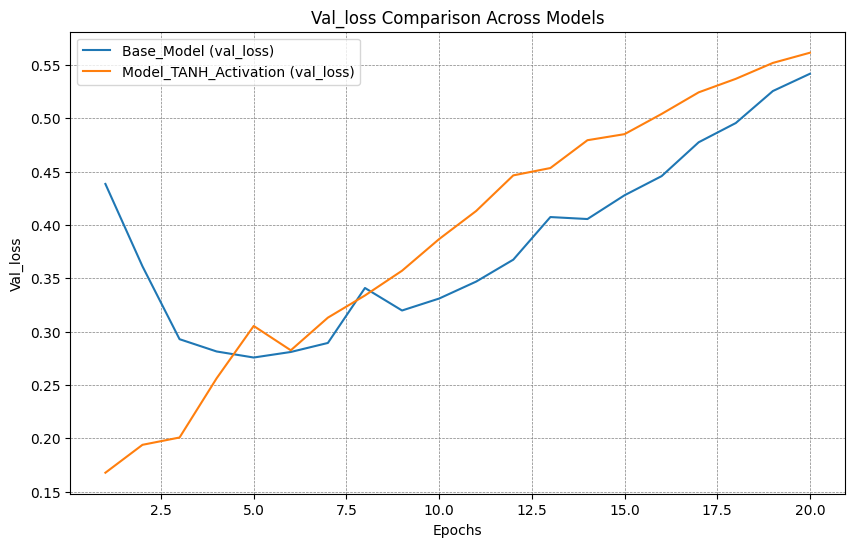

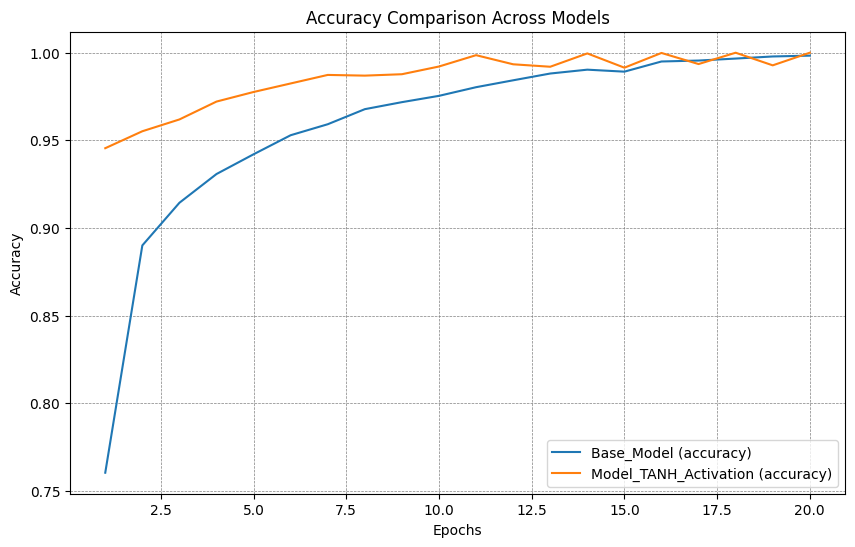

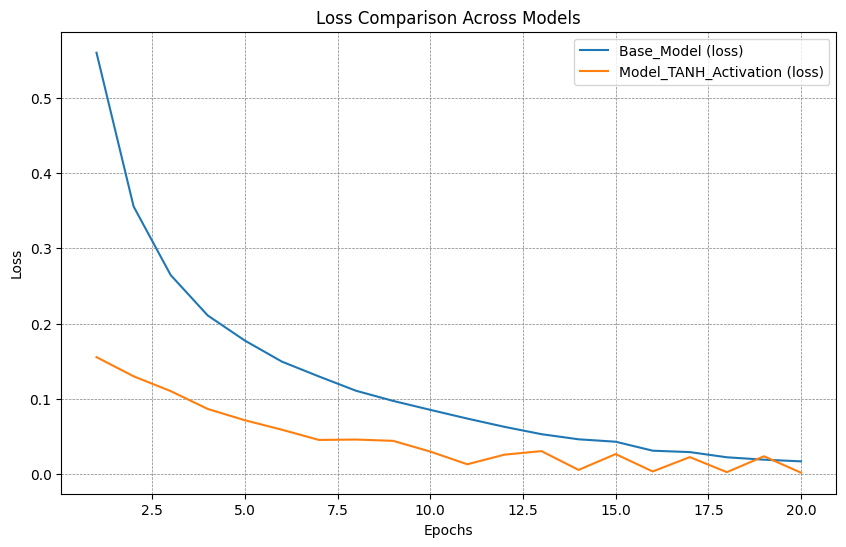

In [198]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_TANH_Activation": Model_TANH_ACT,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))

    # Loop through each model and plot the metrics
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        # Plot the metric values with a label
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    # Title and labels
    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())

    # Adding grid lines with different colors for the background
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

# Plot training accuracy
plot_metrics('accuracy')

# Plot training loss
plot_metrics('loss')


Question 5 - Comparison of L2 regularization, Dropout and Base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


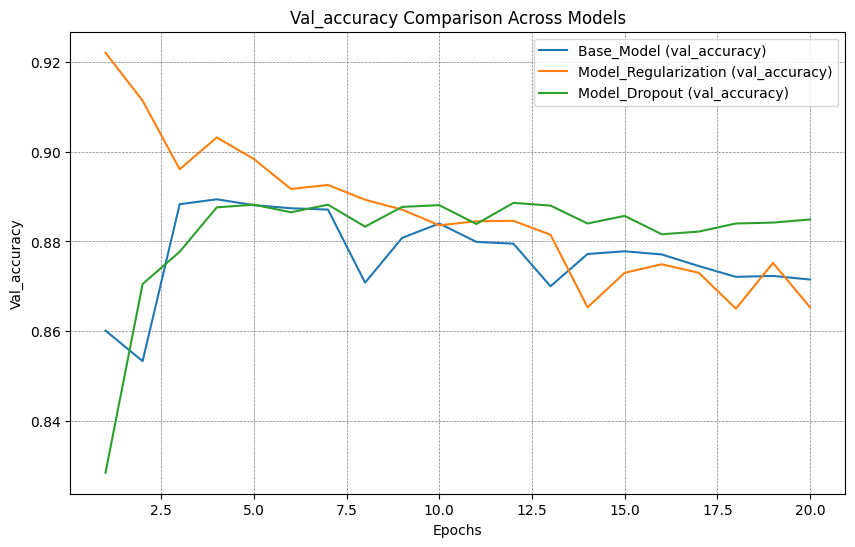

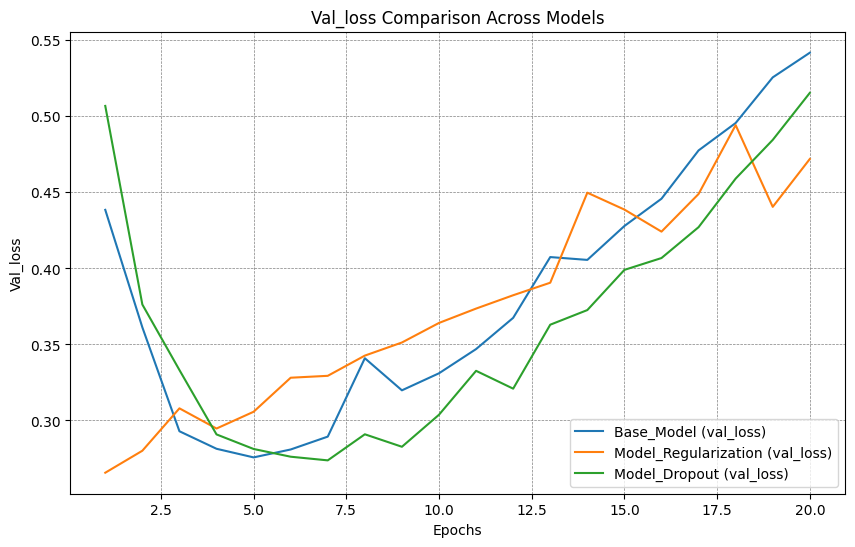

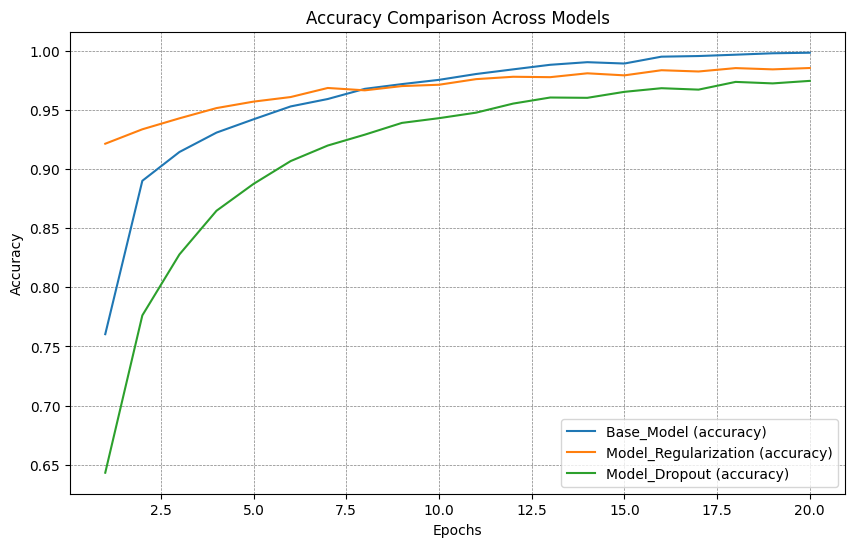

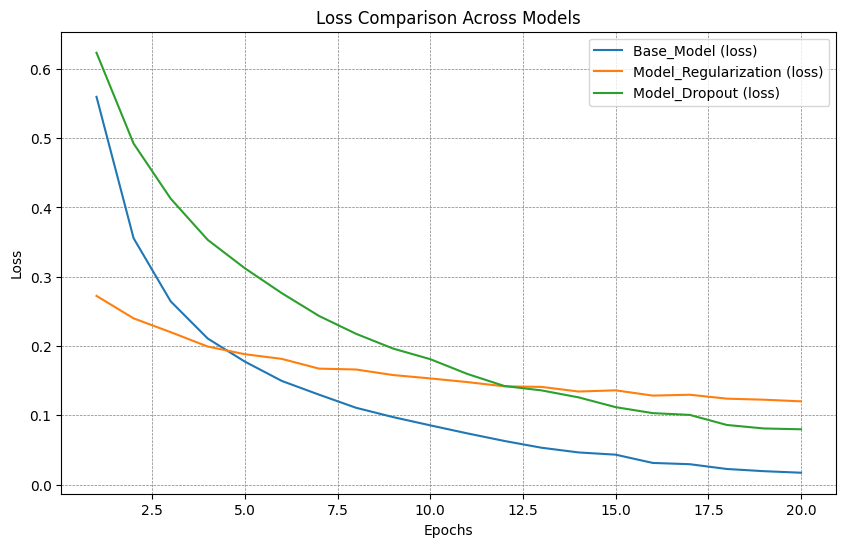

In [199]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))

    # Loop through each model and plot the metrics
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        # Plot the metric values with a label
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    # Title and labels
    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())

    # Adding grid lines with different colors for the background
    plt.grid(True, which='both', axis='both', color='gray', linestyle='--', linewidth=0.5)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

# Plot training accuracy
plot_metrics('accuracy')

# Plot training loss
plot_metrics('loss')


Comparing all the models

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


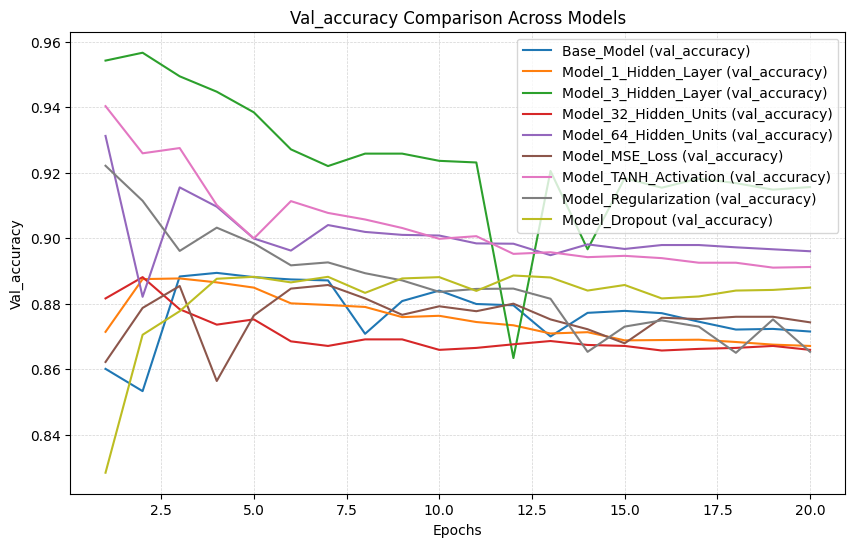

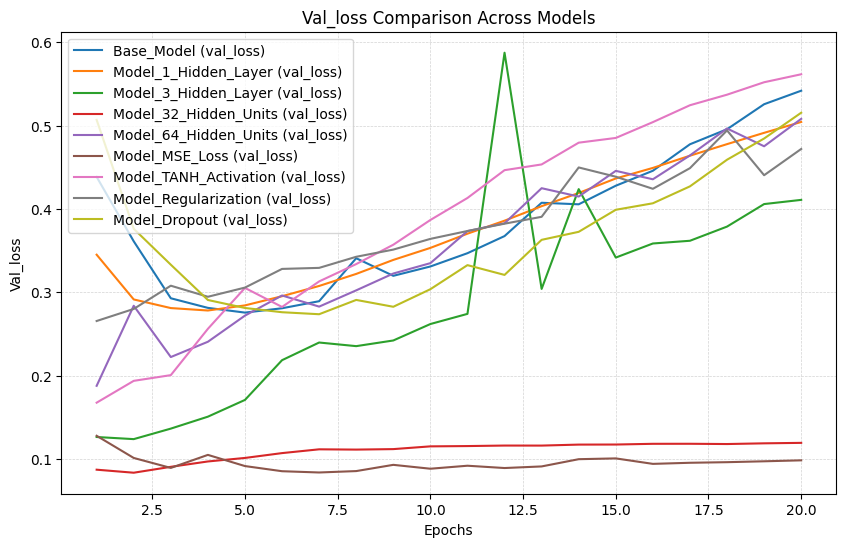

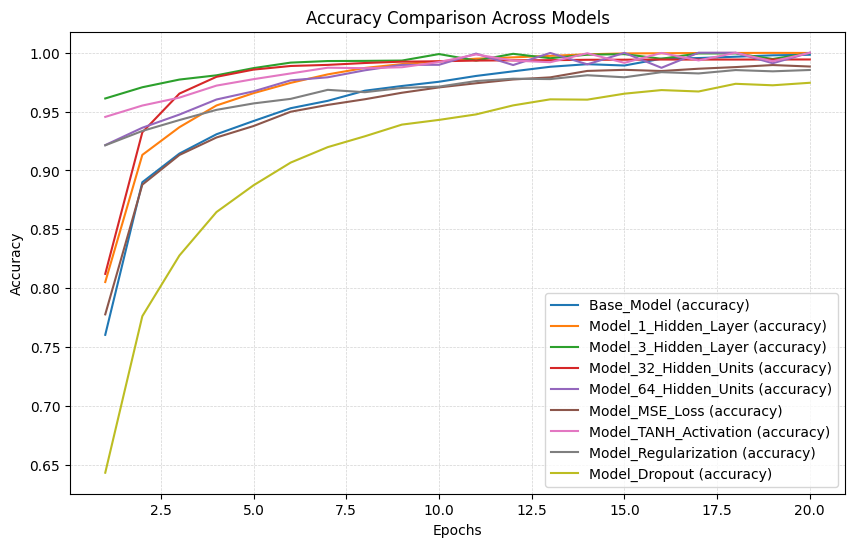

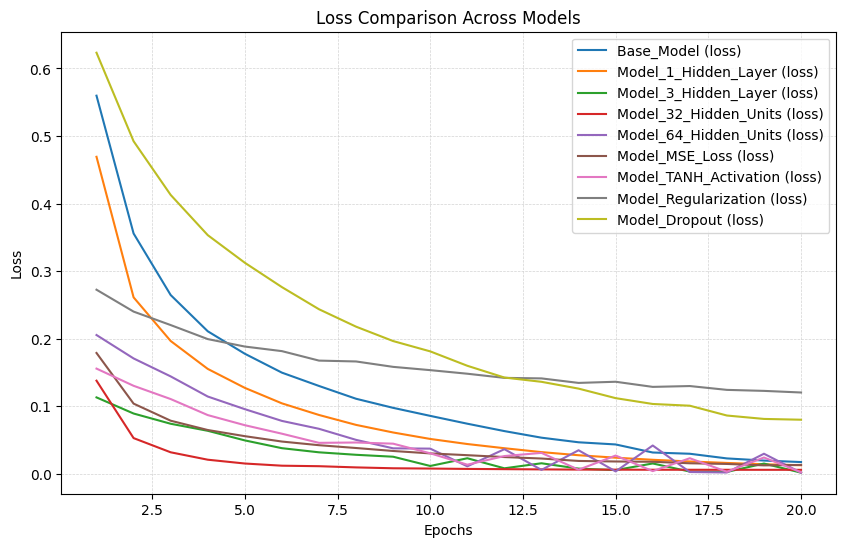

In [200]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))

    # Loop through each model and plot the metrics
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        # Plot the metric values with a label
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    # Title and labels
    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())

    # Adding grid lines with different colors for the background
    plt.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

# Plot training accuracy
plot_metrics('accuracy')

# Plot training loss
plot_metrics('loss')



| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Base Model | 0.29      | 0.88          |
| 1HL      | 0.28      | 0.88          |
| 3HL      | 0.37      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.30      | 0.89          |
| MSE      | 0.09      | 0.88          |
| Tanh     | 0.29      | 0.87          |
| L2       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |